In [486]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [487]:
df=pd.read_csv("analytic_data2021.csv",header=1)

In [488]:
df.dropna(subset = ["county_ranked"], inplace=True)

### Considering only the "rawvalue" features and the county identifiers

In [489]:
cols=[c for c in df.columns if c.lower()[-8:]=='rawvalue']
cols.insert(0,'fipscode')
cols.insert(0,'countycode')
cols.insert(0,'statecode')
df_raw=df[cols]

In [490]:
df_raw

,statecode,countycode,fipscode,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,...,v053_rawvalue,v054_rawvalue,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
2,1,1,1001,7830.053484,0.198392,4.501499,4.850214,0.092018,0.198108,0.330,...,0.159731,0.198643,0.004761,0.011742,0.001038,0.029909,0.737708,0.008033,0.515080,0.420022
3,1,3,1003,7680.477270,0.164607,3.647978,4.768294,0.082920,0.185133,0.300,...,0.209780,0.086076,0.007803,0.010661,0.000690,0.047188,0.832073,0.007085,0.515096,0.422791
4,1,5,1005,11476.629420,0.298415,5.569267,5.590494,0.113553,0.255308,0.412,...,0.196913,0.478287,0.006886,0.004699,0.002106,0.045248,0.455116,0.018907,0.470793,0.677896
5,1,7,1007,12172.562380,0.238533,4.894377,5.271114,0.102210,0.230848,0.374,...,0.166696,0.210726,0.004599,0.002143,0.001161,0.027820,0.744083,0.003353,0.467313,0.683526
6,1,9,1009,11096.050650,0.219856,4.986622,5.357809,0.074305,0.229550,0.330,...,0.187009,0.015080,0.006399,0.003199,0.001159,0.096531,0.867707,0.016185,0.507626,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,7775.070675,0.164432,3.594866,3.980964,0.100567,0.185086,0.303,...,0.129632,0.011856,0.014784,0.010698,0.001630,0.159932,0.792599,0.011332,0.484968,0.109163
3190,56,39,56039,2979.684889,0.114117,2.935199,3.337136,0.078143,0.128844,0.110,...,0.158413,0.006180,0.008865,0.016834,0.001406,0.151466,0.809751,0.039604,0.482526,0.464309
3191,56,41,56041,8081.051208,0.169134,4.025276,4.239036,0.099950,0.207645,0.352,...,0.149560,0.006230,0.014437,0.004944,0.001533,0.092505,0.872985,0.009430,0.494512,0.430959
3192,56,43,56043,6541.074150,0.166508,3.722334,4.081120,0.078176,0.194425,0.292,...,0.221653,0.004869,0.017681,0.008200,0.000769,0.141960,0.822165,0.002511,0.492249,0.359545


### Considering only the 2021 ranked measures (the first 38 columns) 

In [491]:
df_ranked=df_raw.iloc[:,:38]

In [492]:
df_ranked

,statecode,countycode,fipscode,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,...,v044_rawvalue,v082_rawvalue,v140_rawvalue,v043_rawvalue,v135_rawvalue,v125_rawvalue,v124_rawvalue,v136_rawvalue,v067_rawvalue,v137_rawvalue
2,1,1,1001,7830.053484,0.198392,4.501499,4.850214,0.092018,0.198108,0.330,...,5.090408,0.247406,12.229996,272.282220,68.410043,10.4,0.0,0.136310,0.857885,0.383
3,1,3,1003,7680.477270,0.164607,3.647978,4.768294,0.082920,0.185133,0.300,...,4.385135,0.223723,10.503527,203.660396,72.878641,7.2,0.0,0.129967,0.837601,0.404
4,1,5,1005,11476.629420,0.298415,5.569267,5.590494,0.113553,0.255308,0.412,...,5.981993,0.510081,7.636349,414.277861,76.988947,9.4,0.0,0.137106,0.821164,0.309
5,1,7,1007,12172.562380,0.238533,4.894377,5.271114,0.102210,0.230848,0.374,...,5.002608,0.306149,8.482143,89.349126,105.601306,10.0,0.0,0.092552,0.870577,0.520
6,1,9,1009,11096.050650,0.219856,4.986622,5.357809,0.074305,0.229550,0.330,...,4.427838,0.224574,7.780083,482.690611,107.591609,10.6,0.0,0.101257,0.875196,0.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,7775.070675,0.164432,3.594866,3.980964,0.100567,0.185086,0.303,...,4.086863,0.161996,9.988154,300.494146,92.320836,5.0,1.0,0.111862,0.755286,0.168
3190,56,39,56039,2979.684889,0.114117,2.935199,3.337136,0.078143,0.128844,0.110,...,3.992274,0.157728,17.330272,NaN,68.890688,4.5,1.0,0.164866,0.685939,0.162
3191,56,41,56041,8081.051208,0.169134,4.025276,4.239036,0.099950,0.207645,0.352,...,4.167413,0.101535,2.955811,71.006517,93.553574,6.2,0.0,0.107722,0.758711,0.197
3192,56,43,56043,6541.074150,0.166508,3.722334,4.081120,0.078176,0.194425,0.292,...,3.455140,0.194995,15.218770,78.266105,91.772701,4.1,0.0,0.103152,0.775048,0.067


### 1) Exploratory Data Analysis and Data Preparation

I executed the following steps for EDA and Data Preparation:
1. Checking the summary statistics using .describe() method
2. Creating a heatmap to get an intuitive idea of the missing values in the dataset.
3. Impute the missing values by replacing the median of each county group the missing record belongs to.
4. Treat the outliers using the IQR method.
5. My findings from the EDA influenced my outlier treatment method and data imputation technique. I chose to not eliminate the missing rows as there were simply too many of them. It would have led to a loss of useful data. Instead, I used the county-wise median to impute the values. Additionally, for treating outliers, I was initially going to replace the values above 'Q3 + 1.5xIQR' with the maximum of the column and values below 'Q1-1.5xIQR' with the minimum of the column. However, after plotting the histogram, I noticed there was not much of a change between the outlier-treated histogram and the histogram plotted without treating outliers. Subsequently, I decided to replace the values above 'Q3 + 1.5xIQR' with 'Q3 + 1.5xIQR' itself. 

In [493]:
df_ranked.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
statecode,3142.0,30.280076,15.144339,1.000000,18.000000,29.000000,45.000000,56.000000
countycode,3142.0,103.572884,107.704060,1.000000,35.000000,79.000000,133.000000,840.000000
fipscode,3142.0,30383.649268,15162.508374,1001.000000,18177.500000,29176.000000,45080.500000,56045.000000
v001_rawvalue,3081.0,8499.573851,2711.729396,1625.721002,6618.799902,8209.092668,10012.354470,34538.518580
v002_rawvalue,3142.0,0.201157,0.051169,0.085909,0.161705,0.195168,0.235638,0.419192
v036_rawvalue,3142.0,4.391494,0.776739,2.365104,3.822062,4.379742,4.898013,8.301600
v042_rawvalue,3142.0,4.672834,0.665472,2.693138,4.223100,4.706100,5.125508,7.287595
v037_rawvalue,3037.0,0.081821,0.020504,0.027778,0.067885,0.078947,0.091575,0.250000
v009_rawvalue,3142.0,0.213234,0.041526,0.070756,0.185885,0.211144,0.240368,0.445719
v011_rawvalue,3142.0,0.334500,0.059741,0.110000,0.296000,0.338000,0.374000,0.589000


<AxesSubplot:xlabel='v001_rawvalue', ylabel='Count'>

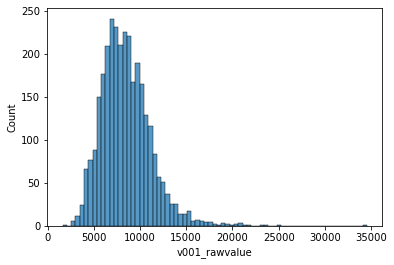

In [494]:
sns.histplot(data=df_ranked,x='v001_rawvalue')

<AxesSubplot:xlabel='v045_rawvalue', ylabel='Count'>

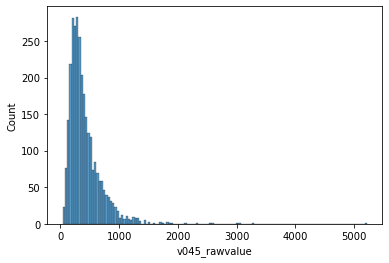

In [495]:
sns.histplot(data=df_ranked,x='v045_rawvalue')

<AxesSubplot:xlabel='v005_rawvalue', ylabel='Count'>

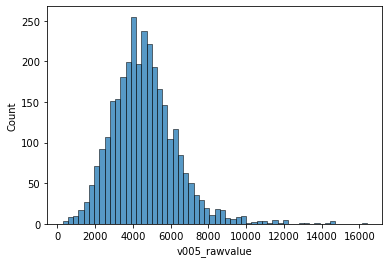

In [496]:
sns.histplot(data=df_ranked,x='v005_rawvalue')

Hence, we can see that there are a lot of features with extremely spread out values. We will need to treat these outliers after accounting for the missing values.

<AxesSubplot:>

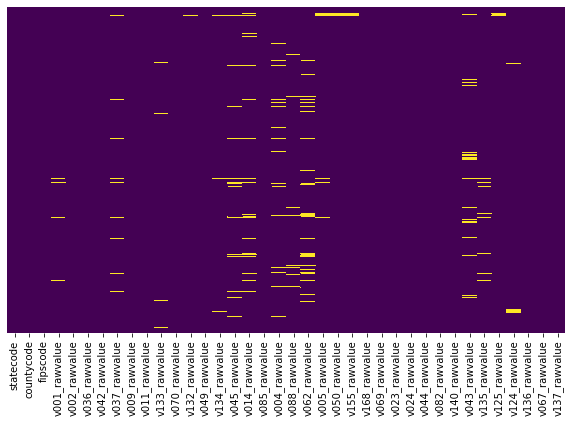

In [497]:
plt.figure(figsize=(10,6))
sns.heatmap(df_ranked.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [498]:
num_cols_miss_vals=0
for col_name in df_ranked.columns:
    if sum(df_ranked.isna()[col_name])>0:
        num_cols_miss_vals+=1
    print(col_name + "- Number of missing values:" + str(sum(df_ranked.isna()[col_name])))
    
print("Therefore, a total of " + str(num_cols_miss_vals) + " columns have missing values")

statecode- Number of missing values:0
countycode- Number of missing values:0
fipscode- Number of missing values:0
v001_rawvalue- Number of missing values:61
v002_rawvalue- Number of missing values:0
v036_rawvalue- Number of missing values:0
v042_rawvalue- Number of missing values:0
v037_rawvalue- Number of missing values:105
v009_rawvalue- Number of missing values:0
v011_rawvalue- Number of missing values:0
v133_rawvalue- Number of missing values:19
v070_rawvalue- Number of missing values:0
v132_rawvalue- Number of missing values:6
v049_rawvalue- Number of missing values:0
v134_rawvalue- Number of missing values:34
v045_rawvalue- Number of missing values:154
v014_rawvalue- Number of missing values:173
v085_rawvalue- Number of missing values:1
v004_rawvalue- Number of missing values:150
v088_rawvalue- Number of missing values:89
v062_rawvalue- Number of missing values:221
v005_rawvalue- Number of missing values:45
v050_rawvalue- Number of missing values:20
v155_rawvalue- Number of missi

#### Therefore, 22 columns have missing values. The proportion of rows missing for all 22 columns is small enough for reasonable replacement with some form of imputation

#### Here, let's further explore v062_rawvalue since it has the highest number of missing values. This column represents the raw value of the mental health providers. We try to see if the values are missing at random or missing systematically, since this will help decide the data imputation method. Analysing the missing data at county and state level to identify any structure-

In [499]:
df[df_ranked['v062_rawvalue'].isna()]['county'].value_counts()

Clay County          3
Marshall County      3
Mitchell County      2
Logan County         2
Calhoun County       2
                    ..
Echols County        1
Swisher County       1
Harding County       1
Stark County         1
Washington County    1
Name: county, Length: 207, dtype: int64

In [500]:
df[df_ranked['v062_rawvalue'].isna()]['state'].value_counts()

TX    40
KS    24
SD    23
ND    21
GA    20
NE    14
IA     9
MT     8
IL     7
TN     6
OK     6
MN     6
MO     5
KY     5
CO     4
MS     4
VA     4
IN     3
AR     3
AL     1
AK     1
FL     1
ID     1
NV     1
LA     1
OR     1
NC     1
MI     1
Name: state, dtype: int64

C:\Users\MIQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v062_rawvalue'>

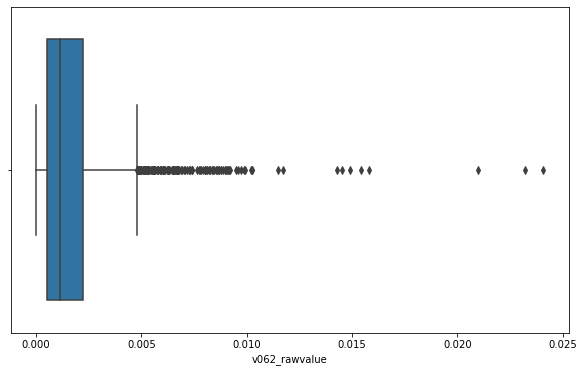

In [501]:
plt.figure(figsize=(10,6))
sns.boxplot(df_ranked['v062_rawvalue'])

#### The data seems to be right skewed. Therefore, we must use median and not mean to impute the values.

#### At this stage, we can decide the level of granularity at which to operate. We can calculate the median of known values in the county that each missing record belongs to. I am choosing county over state because within each state, there would be certain affluent locations with more mental health providers than other locations. Therefore, calculating the median of the state would skew the values more. We will also extend this logic to impute missing values in all other columns with missing data. 

In [502]:
df_ranked['v062_rawvalue']=df_ranked.groupby("countycode")["v062_rawvalue"].transform(lambda x:x.fillna(x.median()))

In [503]:
df_ranked[df_ranked["v062_rawvalue"].isna()]['v062_rawvalue']

75     NaN
532    NaN
2703   NaN
2731   NaN
2735   NaN
2740   NaN
2752   NaN
2759   NaN
2778   NaN
2783   NaN
2785   NaN
2786   NaN
2798   NaN
2815   NaN
2820   NaN
2983   NaN
Name: v062_rawvalue, dtype: float64

#### There are still 16 missing values in the v062_rawvalue columns. This is happening because there are 16 countycodes for which there are only missing values of v062. Hence, the median for the particular county is also na. We can impute these values by calculating the median of the entire column. (Essentially filling in the median of the column to the remaining missing values).

In [504]:
df_ranked["v062_rawvalue"].fillna(df_ranked["v062_rawvalue"].median(), inplace=True)

In [505]:
sum(df_ranked["v062_rawvalue"].isna())

0

#### We will repeat the same process for all the columns having missing values.

In [506]:
missing_cols=['v001_rawvalue','v037_rawvalue','v133_rawvalue','v132_rawvalue','v134_rawvalue'
                                                 ,'v045_rawvalue','v014_rawvalue','v085_rawvalue','v004_rawvalue',
                                                 'v088_rawvalue','v005_rawvalue','v050_rawvalue',
                                                'v085_rawvalue','v155_rawvalue','v023_rawvalue','v024_rawvalue','v044_rawvalue',
                                                'v082_rawvalue','v043_rawvalue','v135_rawvalue','v125_rawvalue','v124_rawvalue']

for col_name in missing_cols:
    df_ranked[col_name]=df_ranked.groupby("countycode")[col_name].transform(lambda x:x.fillna(x.median()))
    df_ranked[col_name].fillna(df_ranked[col_name].median(),inplace=True)

In [507]:
num_cols_miss_vals=0
for col_name in df_ranked.columns:
    if sum(df_ranked.isna()[col_name])>0:
        num_cols_miss_vals+=1
    print(col_name + "- Number of missing values:" + str(sum(df_ranked.isna()[col_name])))
    
print("Therefore, a total of " + str(num_cols_miss_vals) + " columns have missing values")

statecode- Number of missing values:0
countycode- Number of missing values:0
fipscode- Number of missing values:0
v001_rawvalue- Number of missing values:0
v002_rawvalue- Number of missing values:0
v036_rawvalue- Number of missing values:0
v042_rawvalue- Number of missing values:0
v037_rawvalue- Number of missing values:0
v009_rawvalue- Number of missing values:0
v011_rawvalue- Number of missing values:0
v133_rawvalue- Number of missing values:0
v070_rawvalue- Number of missing values:0
v132_rawvalue- Number of missing values:0
v049_rawvalue- Number of missing values:0
v134_rawvalue- Number of missing values:0
v045_rawvalue- Number of missing values:0
v014_rawvalue- Number of missing values:0
v085_rawvalue- Number of missing values:0
v004_rawvalue- Number of missing values:0
v088_rawvalue- Number of missing values:0
v062_rawvalue- Number of missing values:0
v005_rawvalue- Number of missing values:0
v050_rawvalue- Number of missing values:0
v155_rawvalue- Number of missing values:0
v168

#### We use the IQR method to detect and remove outliers in the data. In each column, values that are more than 1.5 x IQR above the 3rd Quartile are replaced with Q3+1.5xIQR and values that are 1.5 x IQR below the 1st Quartile are replaced with Q1-1.5IQR

In [508]:
for col in df_ranked.columns[3:]:
    Q1=df_ranked[col].quantile(0.25)
    Q3=df_ranked[col].quantile(0.75)
    IQR=Q3-Q1
    
    df_ranked.loc[df_ranked[col]>(Q3+1.5*IQR),col]=Q3 + 1.5*IQR
    df_ranked.loc[df_ranked[col]<(Q1-1.5*IQR),col]=Q1 - 1.5*IQR

#### We can now check the summary statistics of the dataframe again and we find that there are no missing values. Compared to the previous summary statistics table, the stats seemed to have changed slightly due to the data imputation and outlier treatment.

In [509]:
df_ranked.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
statecode,3142.0,30.280076,15.144339,1.000000,18.000000,29.000000,45.000000,56.000000
countycode,3142.0,103.572884,107.704060,1.000000,35.000000,79.000000,133.000000,840.000000
fipscode,3142.0,30383.649268,15162.508374,1001.000000,18177.500000,29176.000000,45080.500000,56045.000000
v001_rawvalue,3142.0,8439.114983,2475.445264,1673.042818,6657.687924,8208.718773,9980.784661,14965.429767
v002_rawvalue,3142.0,0.200941,0.050465,0.085909,0.161705,0.195168,0.235638,0.346538
v036_rawvalue,3142.0,4.389274,0.769555,2.365104,3.822062,4.379742,4.898013,6.511941
v042_rawvalue,3142.0,4.671969,0.662458,2.869487,4.223100,4.706100,5.125508,6.479120
v037_rawvalue,3142.0,0.081185,0.018332,0.034569,0.068386,0.079027,0.090930,0.124747
v009_rawvalue,3142.0,0.213076,0.040676,0.104159,0.185885,0.211144,0.240368,0.322094
v011_rawvalue,3142.0,0.334533,0.058807,0.179000,0.296000,0.338000,0.374000,0.491000


### Visualizations to further explore the data

<AxesSubplot:xlabel='v001_rawvalue', ylabel='Count'>

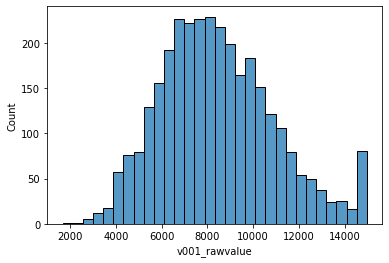

In [510]:
sns.histplot(data=df_ranked,x='v001_rawvalue')

<AxesSubplot:xlabel='v045_rawvalue', ylabel='Count'>

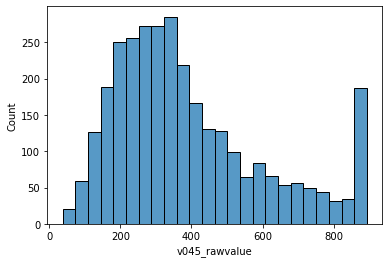

In [511]:
sns.histplot(data=df_ranked,x='v045_rawvalue')

<AxesSubplot:xlabel='v005_rawvalue', ylabel='Count'>

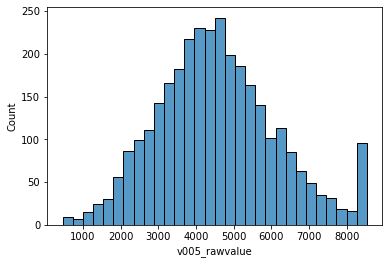

In [512]:
sns.histplot(data=df_ranked,x='v005_rawvalue')

Hence, we now notice how the histogram plot for the same 3 features is not as spread out as before, meaning our outlier treatment was successful. 

#### We now focus on scaling/standardising the data to make it apt for clustering and regression. Since we have already treated the ouliers, we move ahead with MinMaxScaling

In [513]:
from sklearn.preprocessing import MinMaxScaler

In [514]:
df_to_be_scaled=df_ranked[df_ranked.columns[3:]]

scaler=MinMaxScaler().fit(df_to_be_scaled)
df_scaled=df_ranked.copy()
standardized_columns=scaler.transform(df_to_be_scaled)
df_scaled[df_ranked.columns[3:]] = standardized_columns

In [515]:
df_scaled.head(10)

,statecode,countycode,fipscode,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v037_rawvalue,v009_rawvalue,v011_rawvalue,...,v044_rawvalue,v082_rawvalue,v140_rawvalue,v043_rawvalue,v135_rawvalue,v125_rawvalue,v124_rawvalue,v136_rawvalue,v067_rawvalue,v137_rawvalue
2,1,1,1001,0.463198,0.431582,0.515187,0.548733,0.637060,0.431086,0.483974,...,0.688173,0.527528,0.516084,0.435652,0.344877,0.798913,0.0,0.519553,0.692317,0.562821
3,1,3,1003,0.451945,0.301953,0.309362,0.526039,0.536174,0.371553,0.387821,...,0.487467,0.474168,0.443230,0.325857,0.382278,0.451087,0.0,0.486715,0.613652,0.593681
4,1,5,1005,0.737534,0.815359,0.772676,0.753818,0.875871,0.693549,0.746795,...,0.941898,1.000000,0.322240,0.662845,0.416680,0.690217,0.0,0.523674,0.549906,0.454078
5,1,7,1007,0.789890,0.585598,0.609928,0.665338,0.750084,0.581316,0.625000,...,0.663187,0.659876,0.357931,0.142959,0.656155,0.755435,0.0,0.293022,0.741537,0.764144
6,1,9,1009,0.708903,0.513938,0.632173,0.689356,0.440644,0.575358,0.483974,...,0.499619,0.476086,0.328306,0.772306,0.672813,0.820652,0.0,0.338084,0.759452,0.850845
7,1,11,1011,0.686752,0.876880,0.759214,0.699604,1.000000,0.664869,0.919872,...,0.841913,1.000000,0.332991,0.497644,0.599446,0.668478,0.0,0.864795,0.504465,0.695077
8,1,13,1013,0.840685,0.740356,0.728870,0.789163,0.981588,0.569478,0.926282,...,0.665527,0.901162,0.407402,0.930535,0.599942,0.635870,1.0,0.427041,0.702404,0.449669
9,1,15,1015,0.726253,0.578223,0.610085,0.779471,0.658413,0.496406,0.698718,...,0.617882,0.653230,0.601898,1.000000,0.542297,0.842391,0.0,0.465882,0.637507,0.454078
10,1,17,1017,0.654388,0.632433,0.641994,0.720415,1.000000,0.587343,0.782051,...,0.605105,0.738024,0.765757,0.846400,0.537033,0.777174,0.0,0.583151,0.708720,0.434974
11,1,19,1019,0.757085,0.548552,0.613685,0.747424,0.558700,0.603107,0.657051,...,0.614445,0.444776,0.356623,0.528702,0.656593,0.788043,0.0,0.418141,0.548419,0.673035


### 2. Clustering counties to find similarities based on health outcomes and behaviours

### We determine the number of clusters (value of k) by using the elbow method. 

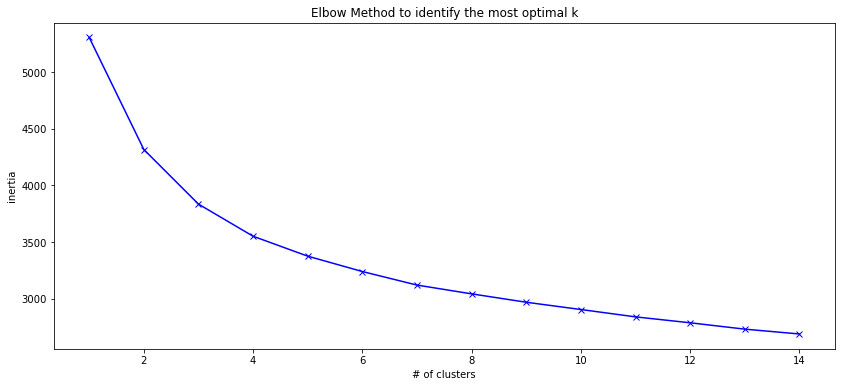

In [516]:
from sklearn.cluster import KMeans
inertia=[]
K=range(1,15)

for k in K:
    kmeansModel=KMeans(init="random", n_clusters=k,n_init=10,max_iter=300,random_state=42)
    kmeansModel.fit(df_scaled[df_scaled.columns[3:]])
    inertia.append(kmeansModel.inertia_)
    
plt.figure(figsize=(14,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.title('Elbow Method to identify the most optimal k')
plt.show()

#### We can see that after k=5, the inertia does not drop that drastically by an increase in the # of clusters. Therefore, we can deduce that the number of optimum clusters in our data is 5.

In [517]:
kmeans=KMeans(init="random", n_clusters=5, n_init=10,max_iter=300,random_state=42)
kmeans.fit(df_scaled[df_scaled.columns[3:]])

KMeans(init='random', n_clusters=5, random_state=42)

In [518]:
df_scaled["Cluster"]=kmeans.labels_

#### Checking the distribution of Clusters-

In [519]:
df_scaled['Cluster'].value_counts()

2    787
1    747
3    660
0    535
4    413
Name: Cluster, dtype: int64

Text(0, 0.5, 'Premature Death')

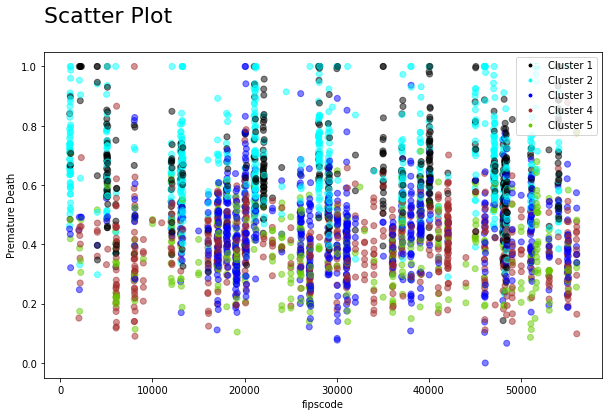

In [483]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,6))

# defining and mapping colors
colors = ['#000000', '#00FFFF', '#0000FF','#A52A2A','#66CD00']
df_scaled['color'] = df_scaled.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})


plt.scatter(df_ranked.fipscode,df_scaled.v001_rawvalue,c=df_scaled.color,alpha=0.5)

# creating a list of legend elements
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper right')

plt.title('Scatter Plot\n', loc='left', fontsize=22)
plt.xlabel('fipscode')
plt.ylabel('Premature Death')

The above plot is not very intuitive to understand, so instead I select a pair of features (one set for health outcomes and one set for health behaviours) and analyze the scatterplot to find grouping of similar counties (through clusters) 

Text(0, 0.5, 'Poor or Fair Health')

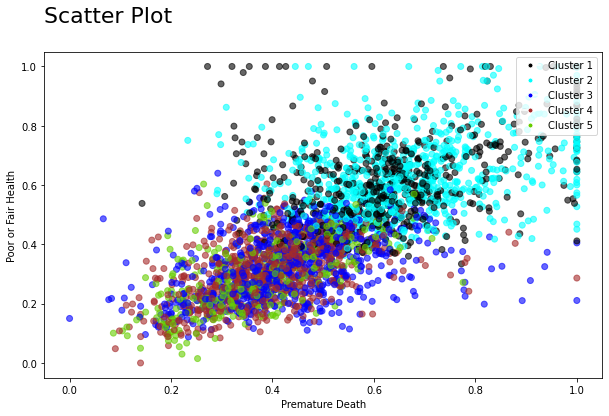

In [264]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,6))

# defining and mapping colors
colors = ['#000000', '#00FFFF', '#0000FF','#A52A2A','#66CD00']
df_scaled['color'] = df_scaled.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})


plt.scatter(df_scaled.v001_rawvalue,df_scaled.v002_rawvalue,c=df_scaled.color,alpha=0.6)

# creating a list of legend elements
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper right')

plt.title('Scatter Plot\n', loc='left', fontsize=22)
plt.xlabel('Premature Death')
plt.ylabel('Poor or Fair Health')

#### From the above plot, we can see that Clusters 4 and 5 seem to overlap in values, and so do clusters 1 and 2. We can create a separate scatterplot for each of these clusters for a clearer view

Text(0, 0.5, 'Poor or Fair Health')

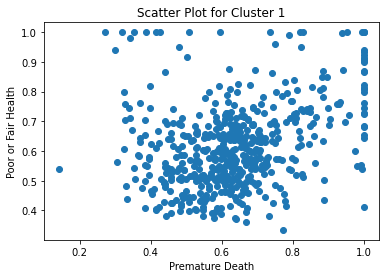

In [522]:
plt.scatter(df_scaled[df_scaled['Cluster']==0].v001_rawvalue,df_scaled[df_scaled['Cluster']==0].v002_rawvalue)
plt.title("Scatter Plot for Cluster 1")
plt.xlabel('Premature Death')
plt.ylabel('Poor or Fair Health')

Text(0, 0.5, 'Poor or Fair Health')

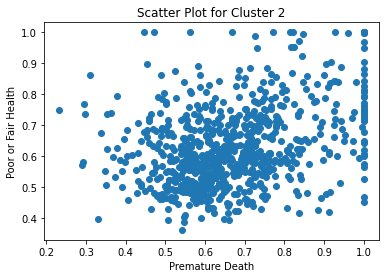

In [521]:
plt.scatter(df_scaled[df_scaled['Cluster']==1].v001_rawvalue,df_scaled[df_scaled['Cluster']==1].v002_rawvalue)
plt.title("Scatter Plot for Cluster 2")
plt.xlabel('Premature Death')
plt.ylabel('Poor or Fair Health')

Text(0, 0.5, 'Poor or Fair Health')

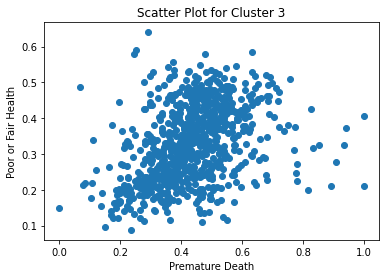

In [520]:
plt.scatter(df_scaled[df_scaled['Cluster']==2].v001_rawvalue,df_scaled[df_scaled['Cluster']==2].v002_rawvalue)
plt.title("Scatter Plot for Cluster 3")
plt.xlabel('Premature Death')
plt.ylabel('Poor or Fair Health')

Text(0, 0.5, 'Poor or Fair Health')

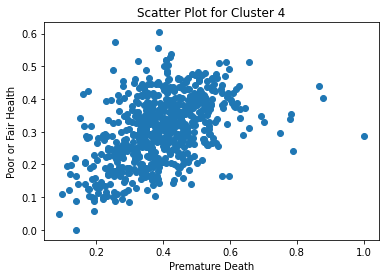

In [265]:
plt.scatter(df_scaled[df_scaled['Cluster']==3].v001_rawvalue,df_scaled[df_scaled['Cluster']==3].v002_rawvalue)
plt.title("Scatter Plot for Cluster 4")
plt.xlabel('Premature Death')
plt.ylabel('Poor or Fair Health')

Text(0, 0.5, 'Poor or Fair Health')

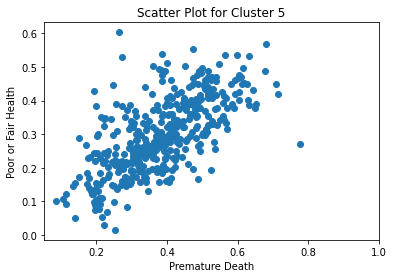

In [266]:
plt.scatter(df_scaled[df_scaled['Cluster']==4].v001_rawvalue,df_scaled[df_scaled['Cluster']==4].v002_rawvalue)
plt.title("Scatter Plot for Cluster 5")
plt.xticks([0.2,0.4,0.6,0.8,1])
plt.xlabel('Premature Death')
plt.ylabel('Poor or Fair Health')

In [388]:
df_ranked.groupby("Cluster")[["v001_rawvalue","v002_rawvalue"]].median()

,v001_rawvalue,v002_rawvalue
Cluster,,
0,9978.307521,0.241774
1,10362.558460,0.245595
2,7439.620001,0.170632
3,6844.260684,0.167765
4,6793.306418,0.163023


Hence, we can see that Clusters 4 and 5 (referring to 4 & 5 in the scatterplot graphs and Cluster 3 & 4 in the above table) resemble each other more in terms of distribution and median values of 'Premature Death' and 'Poor or Fair Health', than any other combinations of 2 clusters. (Clusters 1, 2 and 3 are quite different from each other and to Clusters 4 and 5)

Now, analysing the scatterplots for Physical Inactivity and Adult Smoking for each cluster

Text(0, 0.5, 'Physical Inactivity')

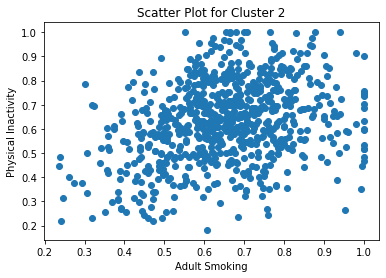

In [527]:
plt.scatter(df_scaled[df_scaled['Cluster']==1].v009_rawvalue,df_scaled[df_scaled['Cluster']==1].v070_rawvalue)
plt.title("Scatter Plot for Cluster 2")
plt.xlabel('Adult Smoking')
plt.ylabel('Physical Inactivity')

Text(0, 0.5, 'Physical Inactivity')

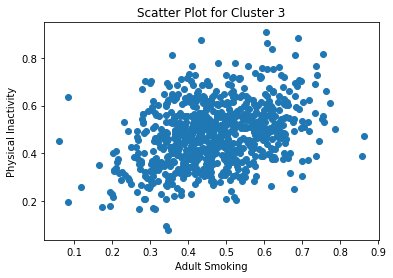

In [528]:
plt.scatter(df_scaled[df_scaled['Cluster']==2].v009_rawvalue,df_scaled[df_scaled['Cluster']==2].v070_rawvalue)
plt.title("Scatter Plot for Cluster 3")
plt.xlabel('Adult Smoking')
plt.ylabel('Physical Inactivity')

#### We can see that the median of Premature Deaths and Poor or Fair Health is quite similar for Clusters 4 and 5 compared to all other clusters. We can further evaluate their similarity for behaviours like smoking and physical inactivity

Text(0, 0.5, 'Physical Inactivity')

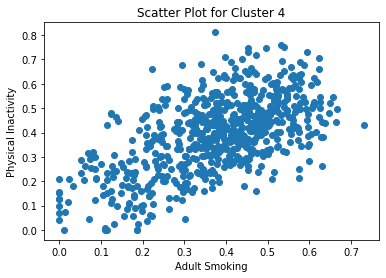

In [529]:
plt.scatter(df_scaled[df_scaled['Cluster']==3].v009_rawvalue,df_scaled[df_scaled['Cluster']==3].v070_rawvalue)
plt.title("Scatter Plot for Cluster 4")
plt.xlabel('Adult Smoking')
plt.ylabel('Physical Inactivity')

Text(0, 0.5, 'Physical Inactivity')

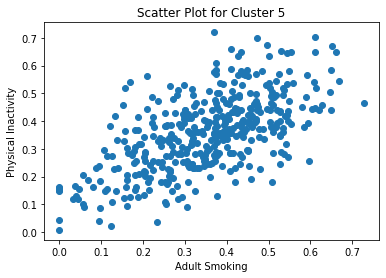

In [530]:
plt.scatter(df_scaled[df_scaled['Cluster']==4].v009_rawvalue,df_scaled[df_scaled['Cluster']==4].v070_rawvalue)
plt.title("Scatter Plot for Cluster 5")
plt.xlabel('Adult Smoking')
plt.ylabel('Physical Inactivity')

In [531]:
df_ranked['Cluster']=kmeans.labels_

In [532]:
df_ranked.groupby("Cluster")[["v009_rawvalue","v070_rawvalue"]].median()

,v009_rawvalue,v070_rawvalue
Cluster,,
0,0.237019,0.297
1,0.248140,0.310
2,0.203301,0.259
3,0.188061,0.235
4,0.184808,0.223


#### We can see that the median of Adult Smoking and Physical Inactivity is quite similar for Clusters 4 and 5 compared to all other clusters.

#### Hence, counties in Clusters 4 and 5 have similar health outcomes and behaviours. Obviously, counties within cluster 4 and cluster 5 also have very similar health outcomes and behaviours

### 3. Predicting Premature Deaths

### Lasso Regression

#### We try to avoid overfitting by doing Lasso Regression as this method tends to penalize high weights/coefficients (in datasets having a high number of features) and shrinks the values of the coefficients. Therefore, Lasso Regression helps avoid overfitting the data. 

#### To avoid data leakage, the standardization of numerical features should always be performed after data splitting (into training and testing sets) and only from the training data. We perform standard scaling for regression since Lasso performs best when all numerical features are centered around 0 and have variance in the same order

In [275]:
y = df_ranked['v001_rawvalue']
X=df_ranked[df_ranked.columns[8:38]]

#### Training the model

In [343]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [344]:
training_data=pd.concat([X_train,y_train],axis=1)
test_data=pd.concat([X_test,y_test],axis=1)

In [345]:
scaler = StandardScaler().fit(training_data)
training_data = scaler.transform(training_data)
test_data=scaler.transform(test_data)

In [346]:
scaled_training_data=pd.DataFrame(training_data)
scaled_testing_data=pd.DataFrame(test_data)

In [347]:
X_train=scaled_training_data.iloc[:,:30]
y_train=scaled_training_data[30]

X_test=scaled_testing_data.iloc[:,:30]
y_test=scaled_testing_data[30]

In [348]:
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [349]:
print('R squared training set', round(lasso.score(X_train, y_train)*100, 4))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 4))

R squared training set 0.0
R squared test set -0.0082


In [351]:
pred_train = lasso.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 4))

# Test data
pred = lasso.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 4))

MSE training set 1.0
MSE test set 1.0125


#### The coefficients in Lasso regression vary according to the determined alpha parameter. Therefore we use a gridsearch function to find the most optimal alpha.

Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

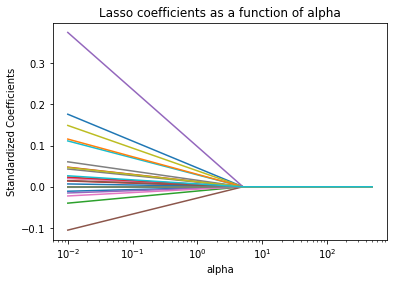

In [353]:
# Coefficients for different lambda values.

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')

#### Moving from left to right in our plot, we observe that at first the lasso models contains many predictors with relatively higher magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

In [354]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [355]:
model.alpha_

0.002844925478412728

#### 0.0028 is the best value of penalization chosen by Cross Validation. We now find the best model:

In [356]:
lasso_best=Lasso(alpha=model.alpha_)
lasso_best.fit(X_train,y_train)

Lasso(alpha=0.002844925478412728)

#### Printing the model coefficients and feature names:

In [359]:
print(list(zip(lasso_best.coef_, X)))

[(0.18579808409841658, 'v009_rawvalue'), (0.02351493382087654, 'v011_rawvalue'), (-0.041119262175181415, 'v133_rawvalue'), (0.04426186871946472, 'v070_rawvalue'), (-0.005691419336043254, 'v132_rawvalue'), (-0.10887603790691319, 'v049_rawvalue'), (0.029539278214650477, 'v134_rawvalue'), (0.05951890573095685, 'v045_rawvalue'), (0.16008746689074246, 'v014_rawvalue'), (0.0, 'v085_rawvalue'), (-0.017940384185097243, 'v004_rawvalue'), (-0.006861495458606815, 'v088_rawvalue'), (-0.0, 'v062_rawvalue'), (0.013266672510632762, 'v005_rawvalue'), (-0.028112741405990786, 'v050_rawvalue'), (-0.0, 'v155_rawvalue'), (0.010180262203935022, 'v168_rawvalue'), (0.07524828923174288, 'v069_rawvalue'), (-0.0056929098630452675, 'v023_rawvalue'), (0.11705057170437634, 'v024_rawvalue'), (0.009592753145839501, 'v044_rawvalue'), (0.11390723714343667, 'v082_rawvalue'), (0.011206922672372149, 'v140_rawvalue'), (0.03117173273258063, 'v043_rawvalue'), (0.37748672180046033, 'v135_rawvalue'), (0.019401151939432513, 'v1

#### Evaluating the Model

In [371]:
print('R squared training set: ', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set: ', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set:  76.68
R squared test set:  81.14


In [372]:
mean_squared_error(y_test, lasso_best.predict(X_test))

0.19095793565175878

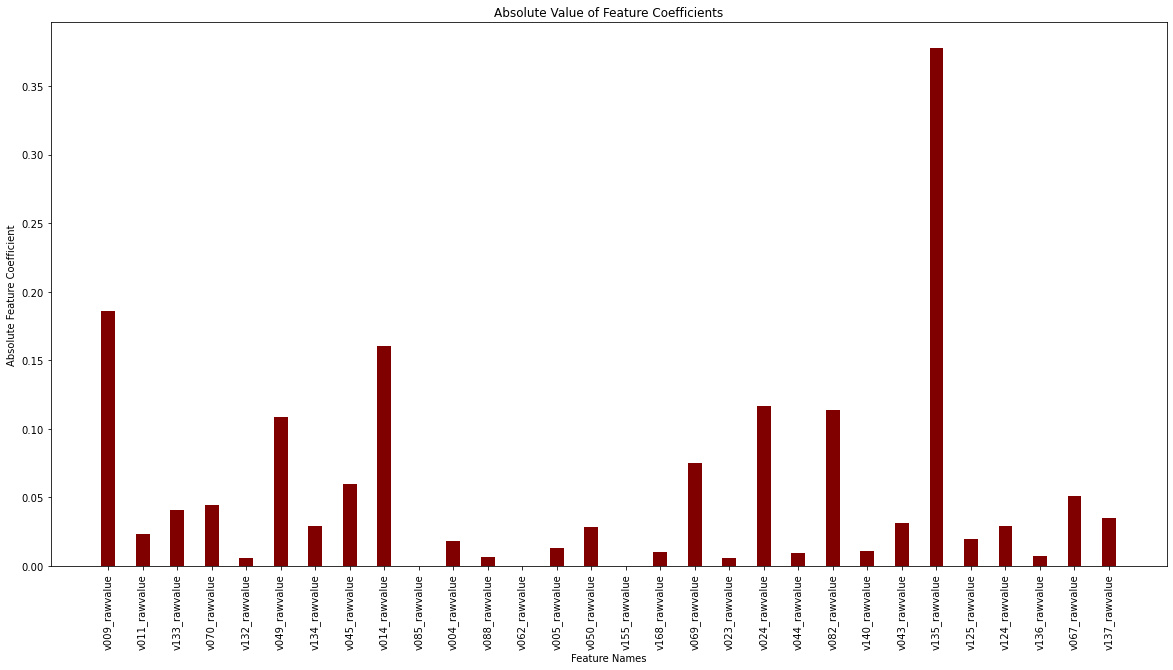

In [386]:
plt.figure(figsize=(20,10))
plt.bar(X.columns,abs(lasso_best.coef_),color='maroon',width=0.4)
plt.xlabel("Feature Names")
plt.ylabel("Absolute Feature Coefficient")
plt.title("Absolute Value of Feature Coefficients")
plt.xticks(rotation = 90)
plt.show()

#### Hence, we see that according to Lasso Regression, the five most important features predicting premature death are:
#### 1. v135_rawvalue (Injury Deaths)
#### 2. v009_rawvalue (Adult Smoking)
#### 3. v014_rawvalue (Teen births)
#### 4. v024_rawvalue (Children in Poverty)
#### 5. v082_rawvalue (Children in single-parent households)

### Random Forest Regression

We use the same scaled/normalized data that we used for Lasso Regression (after the train-test split)

In [393]:
from sklearn.ensemble import RandomForestRegressor

In [396]:
RFregressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

In [398]:
RFregressor.fit(X_train,y_train)
score = RFregressor.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9646595190302221


In [399]:
y_pred = RFregressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 


MSE:  0.20727182030569788
RMSE:  0.10363591015284894


Now, RandomForest does not work with coefficients but rather by ensembling a bunch of decisionTrees, which work by sequentially splitting the data until the optimal criteria is met.

In [404]:
print(list(zip(RFregressor.feature_importances_, X)))

[(0.061903849370298254, 'v009_rawvalue'), (0.00977196115381925, 'v011_rawvalue'), (0.011067505300800964, 'v133_rawvalue'), (0.02295547368242719, 'v070_rawvalue'), (0.007183653182774142, 'v132_rawvalue'), (0.03487936198919268, 'v049_rawvalue'), (0.009406843984163735, 'v134_rawvalue'), (0.015951406039199575, 'v045_rawvalue'), (0.2386245651034989, 'v014_rawvalue'), (0.006428709911007732, 'v085_rawvalue'), (0.007986334559835736, 'v004_rawvalue'), (0.008063290068674634, 'v088_rawvalue'), (0.006266987674371435, 'v062_rawvalue'), (0.013631544037828586, 'v005_rawvalue'), (0.005957554915172379, 'v050_rawvalue'), (0.0069078432390597775, 'v155_rawvalue'), (0.009202307307314191, 'v168_rawvalue'), (0.007499289612932874, 'v069_rawvalue'), (0.007696881414559648, 'v023_rawvalue'), (0.2068524231979258, 'v024_rawvalue'), (0.011692616775623083, 'v044_rawvalue'), (0.039620057323891976, 'v082_rawvalue'), (0.008550917800768892, 'v140_rawvalue'), (0.009151221061085684, 'v043_rawvalue'), (0.1896822193713667, 

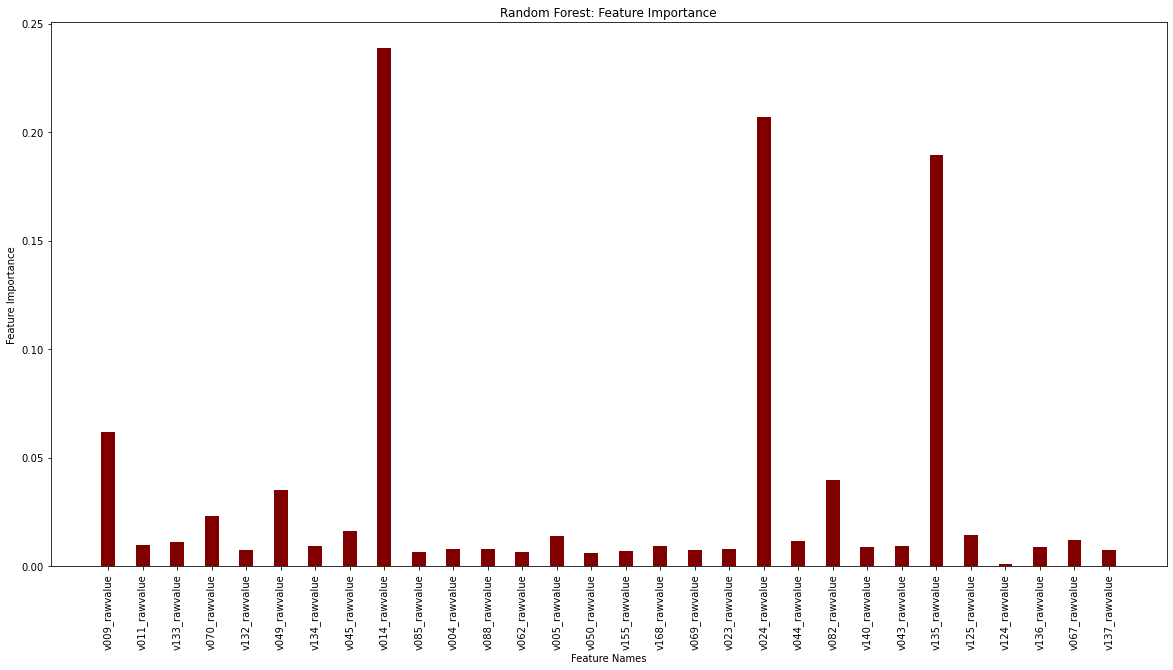

In [408]:
plt.figure(figsize=(20,10))
plt.bar(X.columns,RFregressor.feature_importances_,color='maroon',width=0.4)
plt.xlabel("Feature Names")
plt.ylabel("Feature Importance")
plt.title("Random Forest: Feature Importance")
plt.xticks(rotation = 90)
plt.show()

#### Hence, we see that according to Random Forest Regression, the five most important features predicting premature death are:
#### 1. v014_rawvalue (Teen births)
#### 2. v024_rawvalue (Children in Poverty)
#### 3. v135_rawvalue (Injury Deaths)
#### 4. v009_rawvalue (Adult Smoking)
#### 5. v082_rawvalue (Children in single-parent households)

### Therefore, we see that both Random Forest Regression and Lasso Regression point to the same 5 features (Adult Smoking, Injury Deaths, Children in Poverty, Teen births and Children in single-parent households) as being the most important ones in predicting/influencing premature death.

### 4. Comparing Model Accuracy and reducing premature deaths in Allegheny County

#### We use Mean Squared Error as a metric to evaluate the accuracy of the 2 models. (Higher the MSE, lower the model's accuracy). The Mean Squared Error of the Lasso Regression model is 0.19 while that of Random Forest Regression is 0.20. 

#### Therefore, I believe the Lasso Regression model is more accurate as its MSE is lesser than RF Regression. The smaller the mean squared error, the closer we are to finding the line of best fit. Hence, we use MSE as a metric to evaluate model performance and accuracy. 

It is worth noting that if we were to choose between the models for finding out the five most important features predicting premature death, R-squared would be a more pertinent metric. R-squared value essentially describes the amount of variation of the target variable that is explained by the indepdendent variables. Hence, since R-squared for RF Regression (96%) is higher that than of Lasso Regression (81%), RF Regression would be better suited for selecting the most important features. 

### Recommendations for reducing premature death in Allegheny County

Going by the most important features suggested by the Random Forest Regression Model (since it has a higher R-squared value), I would recommend public health efforts to be directed towards addressing teen births in the county. Teenage pregnancy stems from issues such as poverty, poor access to contraceptives, low or inconsistent use of contraceptives, limited number of healthcare practitioners and healthcare facilities, poor healthcare workers’ attitudes and behavior, and inadequate sexual and reproductive health (SRH) information. Therefore, the Allegheny county public health officials should take efforts to -

1. Target low-income areas and hold educational/informational sessions on the use of contraceptives, other forms of birth control and sexual/reproductive health information (targetting teens in schools)
2. Train healthcare workers to change their negligent attitude and behaviours 
3. Take measures to discourage aduts from smoking (For ex: In grocery chains, cigarettes should be placed/located next to things like rat poision to avert buyers. And educate the school-going population of the risks of smoking

The County officials could also reach out to single-parent households and provide some sort of state-funded childcare benefits.